(100, 100)


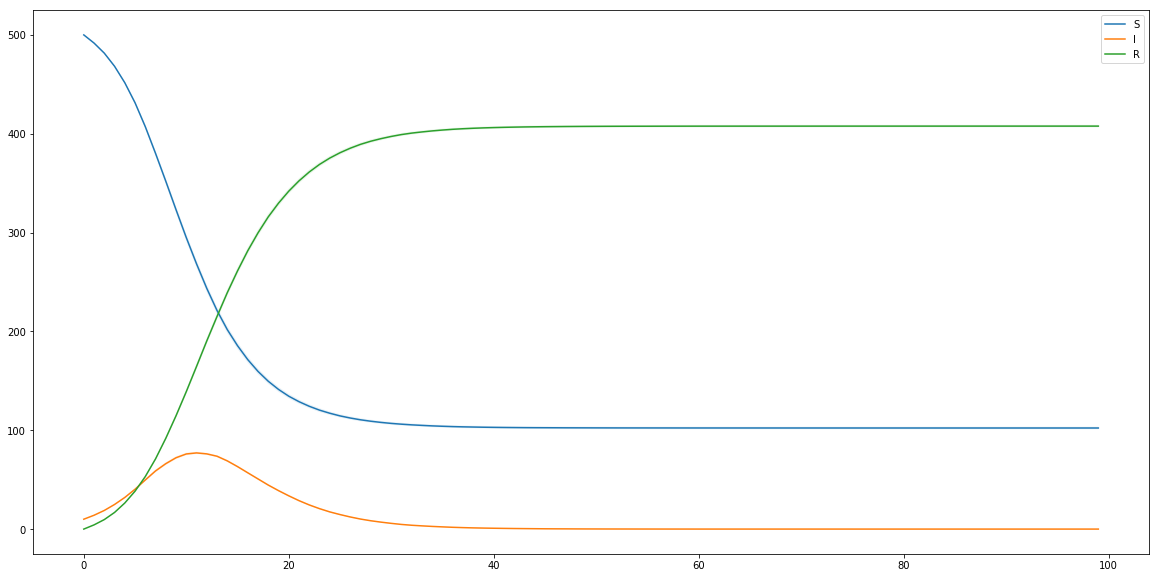

In [2]:
import math
import random
import operator
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np

### input parameters ####################

# init populations in S, I, and R
S0 = 500
I0 = 10
R0 = 0

# Max time
T = 100.0

# Init time
t = 0.0

totalRuns = 1000

# float; rate of infection after contact
gamma = 1.0 / 3.0

rho = 2.0

# float; rate of cure
beta = rho * gamma

# initialize results list

MeanS = [0.0] * int(math.ceil(T))
MeanI = [0.0] * int(math.ceil(T))
MeanR = [0.0] * int(math.ceil(T))
VarS = [0.0] * int(math.ceil(T))
VarI = [0.0] * int(math.ceil(T))
VarR = [0.0] * int(math.ceil(T))
nSamples = 0

# main loop
for runs in range(0,totalRuns):
    samples = [x for x in range(0, int(math.ceil(T)))]
    t = 0.0
    (n_S, n_I, n_R) = (S0, I0, R0)
    while (t < T) and (n_I > 0.0):
     
        rateInfect = beta * float(n_S) * float(n_I) / float(n_S + n_I + n_R)
        rateRecover = gamma * float(n_I)
        totalRates = rateInfect + rateRecover

        dt = -math.log(1.0 - random.uniform(0.0,1.0)) / totalRates
        
        while (len(samples) > 0) and (t >= float(samples[0])):
            sample = samples.pop(0)
            MeanS[sample] += (float(n_S) - MeanS[sample]) / float(runs+1)
            MeanI[sample] += (float(n_I) - MeanI[sample]) / float(runs+1)
            MeanR[sample] += (float(n_R) - MeanR[sample]) / float(runs+1)
            VarS[sample] += float(runs)/float(runs + 1) * (float(n_S) - MeanS[sample])*(float(n_S) - MeanS[sample])
            VarI[sample] += float(runs)/float(runs + 1) * (float(n_I) - MeanI[sample])*(float(n_I) - MeanI[sample])
            VarR[sample] += float(runs)/float(runs + 1) * (float(n_R) - MeanR[sample])*(float(n_R) - MeanR[sample])
            
        t = t + dt

        if random.uniform(0.0,1.0) < (rateInfect / totalRates):
            n_S = n_S - 1
            n_I = n_I + 1

        else:
            n_I = n_I - 1
            n_R = n_R + 1
            
    while (len(samples) > 0):
        sample = samples.pop(0)
        MeanS[sample] += (float(n_S) - MeanS[sample]) / float(runs+1)
        MeanI[sample] += (float(n_I) - MeanI[sample]) / float(runs+1)
        MeanR[sample] += (float(n_R) - MeanR[sample]) / float(runs+1)
        VarS[sample] += float(runs)/float(runs + 1) * (float(n_S) - MeanS[sample])*(float(n_S) - MeanS[sample])
        VarI[sample] += float(runs)/float(runs + 1) * (float(n_I) - MeanI[sample])*(float(n_I) - MeanI[sample])
        VarR[sample] += float(runs)/float(runs + 1) * (float(n_R) - MeanR[sample])*(float(n_R) - MeanR[sample])            

t = [float(x) for x in range(0, int(math.ceil(T)))]            
print(len(MeanS), len(t))
    
VarS = [v/float(totalRuns) for v in VarS]
VarI = [v/float(totalRuns) for v in VarI]
VarR = [v/float(totalRuns) for v in VarR]
    
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(t, MeanS, label="S")
nCI = [x-y for x,y in zip(MeanS, [1.96 * math.sqrt(x)/math.sqrt(totalRuns) for x in VarS])]
pCI = [x+y for x,y in zip(MeanS, [1.96 * math.sqrt(x)/math.sqrt(totalRuns) for x in VarS])]
ax.fill_between(t, nCI, pCI, alpha=.1)
ax.plot(t, MeanI, label="I")
nCI = [x-y for x,y in zip(MeanI, [1.96 * math.sqrt(x)/math.sqrt(totalRuns) for x in VarI])]
pCI = [x+y for x,y in zip(MeanI, [1.96 * math.sqrt(x)/math.sqrt(totalRuns) for x in VarI])]
ax.fill_between(t, nCI, pCI, alpha=.1)
ax.plot(t, MeanR, label="R")
nCI = [x-y for x,y in zip(MeanR, [1.96 * math.sqrt(x)/math.sqrt(totalRuns) for x in VarR])]
pCI = [x+y for x,y in zip(MeanR, [1.96 * math.sqrt(x)/math.sqrt(totalRuns) for x in VarR])]
ax.fill_between(t, nCI, pCI, alpha=.1)
ax.legend()